# <center>CHRONIC KIDNEY DISEASE</center>


# <center> Project Description 

### Problem Statement

Chronic kidney disease (CKD) cause kidney damage, diminishing kidney ability to cleanse the blood. This reduced functionality can lead to the accumulation of harmful waste and excess fluid in the body. As a consequence, individuals with CKD may experience heightened risks of high blood pressure, heart disease, stroke, and premature mortality.  Figures show that CKD has been on the rise. Figure 1 and 2 show that CKD is among the top ten reasons for years of life lost and that this statistics is likely to increase (Kovesdy, 2022). 

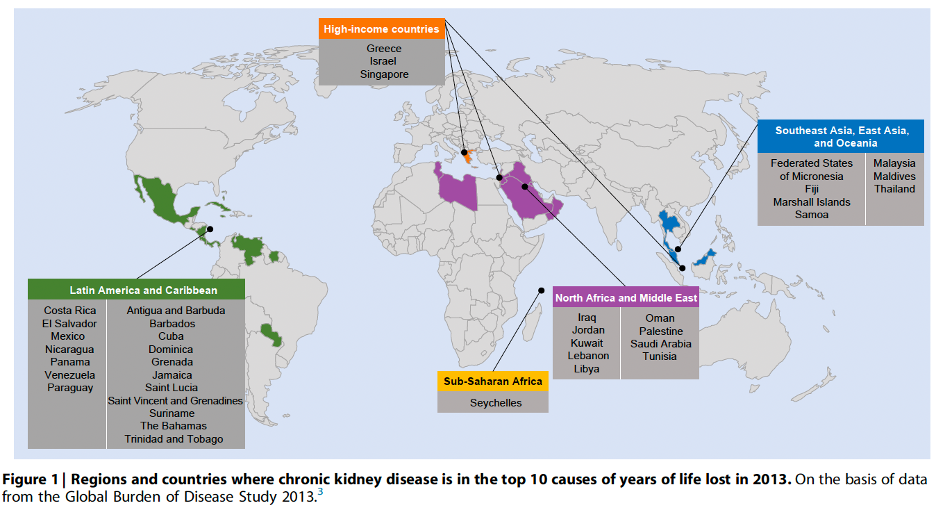


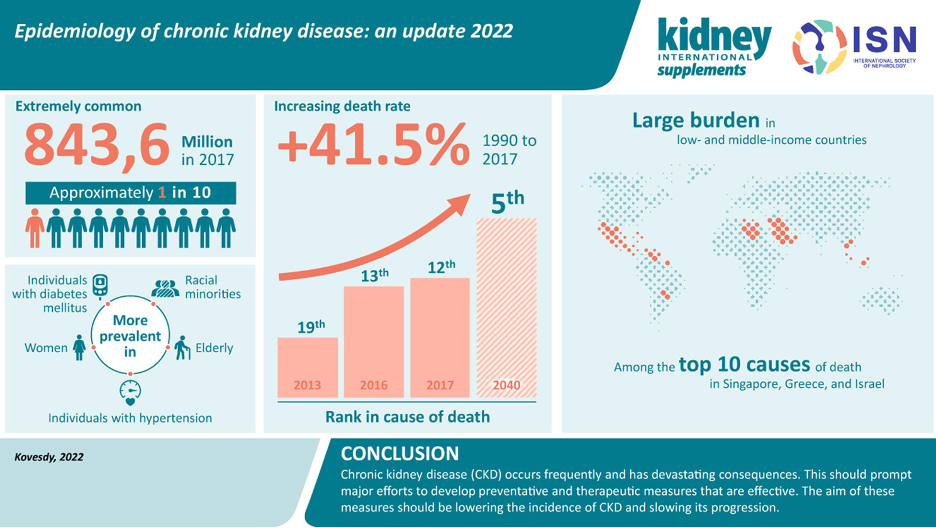


It is estimated that over 14% of US adults are affected by chronic kidney disease (CKD). This number amounts to approximately 35.5 million people and is more than 1 in 7 adults in the United States.  Figure 3 shows this stat from Center for Disease Control. 

 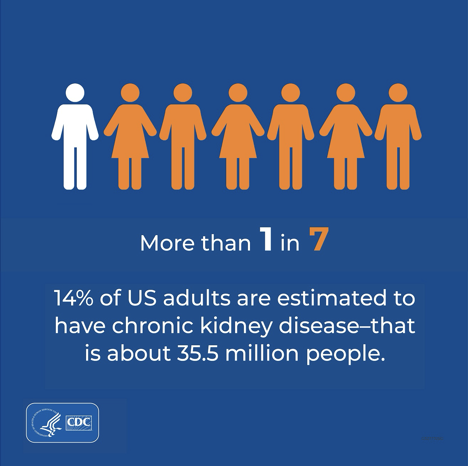



Nevertheless, those diagnosed with CKD, as well as those at risk for developing it, can actively work towards safeguarding their kidney health by following guidance and strategies provided by their healthcare professionals. However, alarmingly, up to 90% of adults with CKD are unaware of their condition. Furthermore, around 33% of adults with severe CKD remain undiagnosed.  This project uses various machine learning techniques to classify CKD. ML can play a significant role in the early detection of CKD. It can analyze medical data from blood test results, urine analysis, and patient history and identify early signs of CKD that might be missed by traditional methods. The early detection is critical for timely intervention. ML can also be used to predict the progression of CKD in patients. By analyzing trends in patient data over time, these algorithms can forecast the deterioration of kidney function. This is important for proactive management of the disease. 

It is also important to note that ML techniques don’t replace traditional methods, which include blood tests, urine tests, ultrasounds or kidney biopsy. Rather, they complement traditional methods. ML is a tool that augments and supports the traditional methods of diagnosing and managing CKD, allowing for more precise, personalized, and proactive care. Hence, it is an enhancement to, rather than a replacement for, the established medical practices. Large healthcare companies typically employ a hybrid method, combining traditional healthcare practices with modern technologies and approaches. This hybrid strategy allows them to leverage the strengths of both conventional medical knowledge and technological advancements.


**Sources** 
- Kovesdy, C. P. (2022). Epidemiology of chronic kidney disease: an update 2022. Kidney International Supplements, 12(1), 7-11.
- Centers for Disease Control and Prevention. Chronic Kidney Disease in the United States, 2023. Atlanta, GA: US Department of Health and Human Services, Centers for Disease Control and Prevention; 2023.




### Data
How to cite data: Rubini,L., Soundarapandian,P., and Eswaran,P.. (2015). Chronic_Kidney_Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C5G020.

## How to Contribute to This Project 
1. How to handle missing observations
2. Model tuning 
3. Your own selection of contribution 

# <center> Set up

### Install Necessary Libraries 

In [99]:
!pip install statsmodels # pip install --upgrade pip
#!pip install --upgrade statsmodels

### Import Required Libraries 

In [100]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
import numpy as np
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import statsmodels.formula.api as smf
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

### Set Working Directory 

In [101]:
print("Current Working Directory: ", os.getcwd()) # Check current working directory
os.chdir('/Users/namigabbasov/Desktop/Projects')  # Set a new working directory
print("New Working Directory: ", os.getcwd())     # Verify the change

Current Working Directory:  /Users/namigabbasov/Desktop/Projects
New Working Directory:  /Users/namigabbasov/Desktop/Projects


In [102]:
# you can check your Python version with this code
import sys
print(sys.version)

3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]


### Import Data 

In [103]:
kidney = pd.read_csv("ckd.csv")
kidney.drop('id', axis =1, inplace = True)

# <center> Data Preprocessing 

In [104]:
kidney.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [105]:
kidney

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0    121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1      NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2    423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3    117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4    106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  
..     ...  ...  ...   ...  ...  ...  ...  ..   ...  ...  ...            ...  
395  140.0  ...   47  6700  4.9   no   no  no  good   no   no         notckd  
396   75.0  ...   54  7800  6.2   no   no  no  good   no   no         notckd  
397  100.0  ...   49  6600  5.4   no   no  no  good   no   no         notckd  
398  114.0  ...   51  7200  5.9   no   no  no  good   no   no         notckd  
399  131.0  ...   53  6800  6.1   no   no  no  good   no   no         notckd  

[400 rows x 25 columns]

In [106]:
# Mapping of current column names to new intutive names

column_name_mapping = {
    'age': 'age',
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'classification': 'class'
}

In [107]:
kidney.rename(columns=column_name_mapping, inplace=True) # change column names to make them intutive 

In [108]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [109]:
kidney.shape

(400, 25)

In [162]:
kidney.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [110]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [111]:
kidney.info() # shows "packed_cell_volume", "white_blood_cell_count", are "red_blood_cell_count" are objects
kidney.head() # but visually shows they are numeric. Next change them to numeric. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44                    7800                   5.2   
1                  38                    6000                   NaN   
2                  31                    7500                   NaN   
3                  32                    6700                   3.9   
4                  35                    7300                   4.6   

   hypertension  diabetes_mellitus coronary_artery_disease appetite  \
0           yes                yes                      no     good   
1            no                 no                      no     good   
2            no                yes                      no     poor   
3           yes                 no                      no     poor   
4            no                 no                      no     good   

  pedal_edema anemia class  
0          no     no   ckd  
1          no     no   ckd  
2          no    yes   ckd  
3         yes    yes   ckd  
4          no     no   ckd  

[5 rows x 25 columns]

In [112]:
### convert these three variables(columns) to numeric type
columns_to_convert = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

for column in columns_to_convert:
    kidney[column] = pd.to_numeric(kidney[column], errors='coerce') #nonconvertables will be converted to NaN

In [113]:
# Let's check if these variables are converted
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [114]:
### Now we will detect possible anomalies -unusual or unexpected values that might be errors or outlier.     


for col in kidney.columns:
    print(f"--{col}-- {kidney[col].unique()} \n")
    
# can you spot errors in "diabetes_mellitus", "coronary_artery_disease", and "class". we will handle them next.

--age-- [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 

--blood_pressure-- [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 

--specific_gravity-- [1.02  1.01  1.005 1.015   nan 1.025] 

--albumin-- [ 1.  4.  2.  3.  0. nan  5.] 

--sugar-- [ 0.  3.  4.  1. nan  2.  5.] 

--red_blood_cells-- [nan 'normal' 'abnormal'] 

--pus_cell-- ['normal' 'abnormal' nan] 

--pus_cell_clumps-- ['notpresent' 'present' nan] 

--bacteria-- ['notpresent' 'present' nan] 

--blood_glucose_random-- [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425

In [115]:
### correct errors with replace method(df[column].replace(to_replace = "old", value ="new"))

kidney['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
kidney['coronary_artery_disease'].replace(to_replace = '\tno', value='no', inplace=True)
kidney['class'].replace(to_replace = 'ckd\t', value ='ckd', inplace=True)

In [116]:
### checking if we have corrected errors

from IPython.display import Markdown, display

def print_bold(text):
    display(Markdown(f"**{text}**"))

    
for col in kidney.columns:
    print_bold(f"--{col} --")
    print(f"{kidney[col].unique()}")

**--age --**

[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]


**--blood_pressure --**

[ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]


**--specific_gravity --**

[1.02  1.01  1.005 1.015   nan 1.025]


**--albumin --**

[ 1.  4.  2.  3.  0. nan  5.]


**--sugar --**

[ 0.  3.  4.  1. nan  2.  5.]


**--red_blood_cells --**

[nan 'normal' 'abnormal']


**--pus_cell --**

['normal' 'abnormal' nan]


**--pus_cell_clumps --**

['notpresent' 'present' nan]


**--bacteria --**

['notpresent' 'present' nan]


**--blood_glucose_random --**

[121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 233. 294. 323. 125.  90.
 308. 118. 224. 128. 122. 214. 213. 268. 256.  84. 105. 288. 139.  78.
 273. 242. 424. 303. 148. 160. 192. 307. 220. 447. 309.  22. 111. 261.
 215. 234. 131. 352.  80. 239. 110. 130. 184. 252. 113. 230. 341. 255.
 103. 238. 248. 120. 241. 269. 201. 203. 463. 176.  82. 119.  97.  96.
  81. 116. 134.  85.  83.  87.  75.]


**--blood_urea --**

[ 36.   18.   53.   56.   26.   25.   54.   31.   60.  107.   55.   72.
  86.   90.  162.   46.   87.   27.  148.  180.  163.    nan  50.   75.
  45.   28.  155.   33.   39.  153.   29.   65.  103.   70.   80.   20.
 202.   77.   89.   24.   17.   32.  114.   66.   38.  164.  142.   96.
 391.   15.  111.   73.   19.   92.   35.   16.  139.   48.   85.   98.
 186.   37.   47.   52.   82.   51.  106.   22.  217.   88.  118.   50.1
  71.   34.   40.   21.  219.   30.  125.  166.   49.  208.  176.   68.
 145.  165.  322.   23.  235.  132.   76.   42.   44.   41.  113.    1.5
 146.   58.  133.  137.   67.  115.  223.   98.6 158.   94.   74.  150.
  61.   57.   95.  191.   93.  241.   64.   79.  215.  309.   10. ]


**--serum_creatinine --**

[ 1.2   0.8   1.8   3.8   1.4   1.1  24.    1.9   7.2   4.    2.7   2.1
  4.6   4.1   9.6   2.2   5.2   1.3   1.6   3.9  76.    7.7    nan  2.4
  7.3   1.5   2.5   2.    3.4   0.7   1.   10.8   6.3   5.9   0.9   3.
  3.25  9.7   6.4   3.2  32.    0.6   6.1   3.3   6.7   8.5   2.8  15.
  2.9   1.7   3.6   5.6   6.5   4.4  10.2  11.5   0.5  12.2   5.3   9.2
 13.8  16.9   6.    7.1  18.    2.3  13.   48.1  14.2  16.4   2.6   7.5
  4.3  18.1  11.8   9.3   6.8  13.5  12.8  11.9  12.   13.4  15.2  13.3
  0.4 ]


**--sodium --**

[  nan 111.  142.  104.  114.  131.  138.  135.  130.  141.  139.    4.5
 136.  129.  140.  132.  133.  134.  125.  163.  137.  128.  143.  127.
 146.  126.  122.  147.  124.  115.  145.  113.  120.  150.  144. ]


**--potassium --**

[ nan  2.5  3.2  4.   3.7  4.2  5.8  3.4  6.4  4.9  4.1  4.3  5.2  3.8
  4.6  3.9  4.7  5.9  4.8  4.4  6.6 39.   5.5  5.   3.5  3.6  7.6  2.9
  4.5  5.7  5.4  5.3 47.   6.3  5.1  5.6  3.   2.8  2.7  6.5  3.3]


**--hemoglobin --**

[15.4 11.3  9.6 11.2 11.6 12.2 12.4 10.8  9.5  9.4  9.7  9.8  5.6  7.6
 12.6 12.1 12.7 10.3  7.7 10.9  nan 11.1  9.9 12.5 12.9 10.1 12.  13.
  7.9  9.3 15.  10.   8.6 13.6 10.2 10.5  6.6 11.   7.5 15.6 15.2  4.8
  9.1  8.1 11.9 13.5  8.3  7.1 16.1 10.4  9.2  6.2 13.9 14.1  6.  11.8
 11.7 11.4 14.   8.2 13.2  6.1  8.  12.3  8.4 14.3  9.   8.7 10.6 13.1
 10.7  5.5  5.8  6.8  8.8  8.5 13.8 11.5  7.3 13.7 12.8 13.4  6.3  3.1
 17.  15.9 14.5 15.5 16.2 14.4 14.2 16.3 14.8 16.5 15.7 13.3 14.6 16.4
 16.9 16.  14.7 16.6 14.9 16.7 16.8 15.8 15.1 17.1 17.2 15.3 17.3 17.4
 17.7 17.8 17.5 17.6]


**--packed_cell_volume --**

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]


**--white_blood_cell_count --**

[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]


**--red_blood_cell_count --**

[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6.5]


**--hypertension --**

['yes' 'no' nan]


**--diabetes_mellitus --**

['yes' 'no' nan]


**--coronary_artery_disease --**

['no' 'yes' nan]


**--appetite --**

['good' 'poor' nan]


**--pedal_edema --**

['no' 'yes' nan]


**--anemia --**

['no' 'yes' nan]


**--class --**

['ckd' 'notckd']


### Handle Missing Observations 
These are some of way we can handle missing observations. 
1. drop them based on columns, rows, or threshold. This is called listwise deletion.
2. pairwise deletion. In statisatical analysis, you keep missing observations. A given model just grabs those that are not missing.
3. fill up with Mean, Median, or Mode( for categorical data)
4. Make a random sample from the existing values 


In [117]:
### let's first explore missing observations

#(<NA> is new versatile type, NaN is standard IEEE floating-point representation)

print(kidney.isnull().sum().sort_values())
print(kidney.info())

# looks like numeric variables have more missing observations. 
# therefore different ways of handling missing observations will be needed for categorial and numeric variables

class                        0
pedal_edema                  1
appetite                     1
anemia                       1
coronary_artery_disease      2
diabetes_mellitus            2
hypertension                 2
pus_cell_clumps              4
bacteria                     4
age                          9
blood_pressure              12
serum_creatinine            17
blood_urea                  19
blood_glucose_random        44
albumin                     46
specific_gravity            47
sugar                       49
hemoglobin                  52
pus_cell                    65
packed_cell_volume          71
sodium                      87
potassium                   88
white_blood_cell_count     106
red_blood_cell_count       131
red_blood_cells            152
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  

In [118]:
### so let's make separate lists of names of these variables 

factors = [col for col in kidney.columns if kidney[col].dtype == 'object']
numeric = [col for col in kidney.columns if kidney[col].dtype != 'object']

In [119]:
kidney[factors].isnull().sum().sort_values()

class                        0
appetite                     1
pedal_edema                  1
anemia                       1
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
pus_cell_clumps              4
bacteria                     4
pus_cell                    65
red_blood_cells            152
dtype: int64

In [120]:
kidney[numeric].isnull().sum().sort_values()

age                         9
blood_pressure             12
serum_creatinine           17
blood_urea                 19
blood_glucose_random       44
albumin                    46
specific_gravity           47
sugar                      49
hemoglobin                 52
packed_cell_volume         71
sodium                     87
potassium                  88
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [121]:
### Now we will store the number of missing values in each column

missing_values = kidney.isnull().sum()


# Next define thresholds for 
threshold = 4   

# Classify columns based on the number of missing values
few_missing = missing_values[(missing_values <= threshold) &(missing_values>0)].index.tolist()
more_missing = missing_values[missing_values >threshold].index.tolist()

In [122]:
### These are columns that have few missing observations
few_missing

['pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia']

In [123]:
### These are columns that have more missing observations
more_missing

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [124]:
print(len(factors))
print(len(numeric))
print(type(factors))
print(type(numeric))
print(list(enumerate(numeric)))
print(list(enumerate(factors)))

11
14
<class 'list'>
<class 'list'>
[(0, 'age'), (1, 'blood_pressure'), (2, 'specific_gravity'), (3, 'albumin'), (4, 'sugar'), (5, 'blood_glucose_random'), (6, 'blood_urea'), (7, 'serum_creatinine'), (8, 'sodium'), (9, 'potassium'), (10, 'hemoglobin'), (11, 'packed_cell_volume'), (12, 'white_blood_cell_count'), (13, 'red_blood_cell_count')]
[(0, 'red_blood_cells'), (1, 'pus_cell'), (2, 'pus_cell_clumps'), (3, 'bacteria'), (4, 'hypertension'), (5, 'diabetes_mellitus'), (6, 'coronary_artery_disease'), (7, 'appetite'), (8, 'pedal_edema'), (9, 'anemia'), (10, 'class')]


In [125]:
### make a function to impute the variables with few missing observations(with their mode) 

def impute_missing_with_mode(df, cols):
    for col in cols:
        
        # Calculate the mode of the column
        mode_value = df[col].mode()[0]

        # Impute missing values with the mode
        df[col].fillna(mode_value, inplace=True)

In [126]:
### run function 
impute_missing_with_mode(kidney, few_missing)

In [127]:
### check if missing values are imputed
kidney[few_missing].isnull().sum()

pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
dtype: int64

In [128]:
### make a function to impute the variables with more missing observations(random sampling) 

def random_sample_imputation(df, columns):
    for col in columns:
        
        # Random sample from the non-null values to fill the NaNs
        df[col] = df[col].apply(lambda x: np.random.choice(df[col].dropna()) if pd.isnull(x) else x)

# List of columns with more missing values
more_missing = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
                'red_blood_cells', 'pus_cell', 'blood_glucose_random', 'blood_urea',
                'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume',
                'white_blood_cell_count', 'red_blood_cell_count']

In [129]:
### run imputation function 

random_sample_imputation(kidney, more_missing)

In [130]:
### Check if missing values are filled

kidney[more_missing].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
red_blood_cells           0
pus_cell                  0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [131]:
### recoding columns into 0 and 1

binary_mapping = { 
    'red_blood_cells': {'normal': 0, 'abnormal': 1},
    'pus_cell': {'normal': 0, 'abnormal': 1},
    'pus_cell_clumps': {'notpresent': 0, 'present': 1},
    'bacteria': {'notpresent': 0, 'present': 1},
    'hypertension': {'no': 0, 'yes': 1},
    'diabetes_mellitus': {'no': 0, 'yes': 1},
    'coronary_artery_disease': {'no': 0, 'yes': 1},
    'appetite': {'good': 0, 'poor': 1},
    'pedal_edema': {'no': 0, 'yes': 1},
    'anemia': {'no': 0, 'yes': 1},
    'class': {'notckd': 0, 'ckd': 1}
}

In [132]:
### loop over to encode the variables now 

for var, mapping in binary_mapping.items():
    kidney[var] = kidney[var].map(mapping)

In [133]:
kidney.head(20)

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0   48.0            80.0             1.020      1.0    0.0                1   
1    7.0            50.0             1.020      4.0    0.0                0   
2   62.0            80.0             1.010      2.0    3.0                0   
3   48.0            70.0             1.005      4.0    0.0                0   
4   51.0            80.0             1.010      2.0    0.0                0   
5   60.0            90.0             1.015      3.0    0.0                1   
6   68.0            70.0             1.010      0.0    0.0                0   
7   24.0            80.0             1.015      2.0    4.0                0   
8   52.0           100.0             1.015      3.0    0.0                0   
9   53.0            90.0             1.020      2.0    0.0                1   
10  50.0            60.0             1.010      2.0    4.0                0   
11  63.0            70.0             1.010      3.0    0.0                1   
12  68.0            70.0             1.015      3.0    1.0                1   
13  68.0            70.0             1.010      0.0    3.0                0   
14  68.0            80.0             1.010      3.0    2.0                0   
15  40.0            80.0             1.015      3.0    0.0                1   
16  47.0            70.0             1.015      2.0    0.0                0   
17  47.0            80.0             1.010      1.0    0.0                0   
18  60.0           100.0             1.025      0.0    3.0                0   
19  62.0            60.0             1.015      1.0    0.0                0   

    pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0          0                0         0                 121.0  ...   
1          0                0         0                 130.0  ...   
2          0                0         0                 423.0  ...   
3          1                1         0                 117.0  ...   
4          0                0         0                 106.0  ...   
5          0                0         0                  74.0  ...   
6          0                0         0                 100.0  ...   
7          1                0         0                 410.0  ...   
8          1                1         0                 138.0  ...   
9          1                1         0                  70.0  ...   
10         1                1         0                 490.0  ...   
11         1                1         0                 380.0  ...   
12         0                1         0                 208.0  ...   
13         0                0         0                  98.0  ...   
14         1                1         1                 157.0  ...   
15         0                0         0                  76.0  ...   
16         0                0         0                  99.0  ...   
17         0                0         0                 114.0  ...   
18         0                0         0                 263.0  ...   
19         1                1         0                 100.0  ...   

    packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                 44.0                  7800.0                   5.2   
1                 38.0                  6000.0                   4.9   
2                 31.0                  7500.0                   5.6   
3                 32.0                  6700.0                   3.9   
4                 35.0                  7300.0                   4.6   
5                 39.0                  7800.0                   4.4   
6                 36.0                  6200.0                   6.2   
7                 44.0                  6900.0                   5.0   
8                 33.0                  9600.0                   4.0   
9                 29.0                 12100.0                   3.7   
10                28.0                 14900.0                   5.3   
11        

In [134]:
kidney.tail(20)

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
380  59.0            60.0             1.020      0.0    0.0                0   
381  71.0            70.0             1.025      0.0    0.0                0   
382  48.0            80.0             1.025      0.0    0.0                0   
383  80.0            80.0             1.025      0.0    0.0                0   
384  57.0            60.0             1.020      0.0    0.0                0   
385  63.0            70.0             1.020      0.0    0.0                0   
386  46.0            70.0             1.025      0.0    0.0                0   
387  15.0            80.0             1.025      0.0    0.0                0   
388  51.0            80.0             1.020      0.0    0.0                0   
389  41.0            80.0             1.025      0.0    0.0                0   
390  52.0            80.0             1.025      0.0    0.0                0   
391  36.0            80.0             1.025      0.0    0.0                0   
392  57.0            80.0             1.020      0.0    0.0                0   
393  43.0            60.0             1.025      0.0    0.0                0   
394  50.0            80.0             1.020      0.0    0.0                0   
395  55.0            80.0             1.020      0.0    0.0                0   
396  42.0            70.0             1.025      0.0    0.0                0   
397  12.0            80.0             1.020      0.0    0.0                0   
398  17.0            60.0             1.025      0.0    0.0                0   
399  58.0            80.0             1.025      0.0    0.0                0   

     pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
380         0                0         0                 113.0  ...   
381         0                0         0                  79.0  ...   
382         0                0         0                  75.0  ...   
383         0                0         0                 119.0  ...   
384         0                0         0                 132.0  ...   
385         0                0         0                 113.0  ...   
386         0                0         0                 100.0  ...   
387         0                0         0                  93.0  ...   
388         0                0         0                  94.0  ...   
389         0                0         0                 112.0  ...   
390         0                0         0                  99.0  ...   
391         0                0         0                  85.0  ...   
392         0                0         0                 133.0  ...   
393         0                0         0                 117.0  ...   
394         0                0         0                 137.0  ...   
395         0                0         0                 140.0  ...   
396         0                0         0                  75.0  ...   
397         0                0         0                 100.0  ...   
398         0                0         0                 114.0  ...   
399         0                0         0                 131.0  ...   

     packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
380                54.0                  6500.0                   4.9   
381                40.0                  5800.0                   5.9   
382                51.0                  6000.0                   6.5   
383                49.0                  5100.0                   5.0   
384                42.0                 11000.0                   4.5   
385                52.0                  8000.0                   5.1   
386                43.0                  5700.0                   6.5   
387                50.0                  6200.0                   5.2   
388                46.0                  9500.0                   6.4   
389                52.0                  7200.0                   5.8   
390                52.0       

In [135]:
for col in kidney.columns:
    print(f"--{col}--{kidney[col]}\n")

--age--0      48.0
1       7.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: float64

--blood_pressure--0      80.0
1      50.0
2      80.0
3      70.0
4      80.0
       ... 
395    80.0
396    70.0
397    80.0
398    60.0
399    80.0
Name: blood_pressure, Length: 400, dtype: float64

--specific_gravity--0      1.020
1      1.020
2      1.010
3      1.005
4      1.010
       ...  
395    1.020
396    1.025
397    1.020
398    1.025
399    1.025
Name: specific_gravity, Length: 400, dtype: float64

--albumin--0      1.0
1      4.0
2      2.0
3      4.0
4      2.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: albumin, Length: 400, dtype: float64

--sugar--0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: sugar, Length: 400, dtype: float64

--red_blood_cells--0      1
1      0
2      0
3      0
4

In [136]:
for i in kidney.columns:
    print(f"--{col}--{kidney[col].value_counts()}")

--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int64
--class--class
1    250
0    150
Name: count, dtype: int

In [137]:
kidney.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

# <center> Explanatory Data Analysis (EDA) 


EDA is an important step in a data science project where we analyze and visualize data sets to summarize their main characteristics. It helps to identify patterns, trends, and potential anomalies in the data. For EDA, various statistical graphics and other data visualization methods are used. This step comes after initial data cleaning and before model training. But keep in mind that there is not a right asnwer whether EDA or pre-processing should come first, althouth it is a common practice to do preprocessing before EDA. You might do further pre-processing after the EDA visualizations reveal some skewed data or any kind of issues for modeling.Preprocessing and EDA are iterative and overlapping processes. Insights from EDA can often lead you back to preprocessing for further adjustments. Both of these stages are critical to ensure that the data fed into the model is clean, relevant, and well-understood, which are key factors in building a successful machine learning model. Usual key EDA steps include:

#### Summary Statistics
- Understanding basic descriptive statistics like mean, median, mode, standard deviation, etc.

#### Data Visualization:
- Univariate analysis such as histograms, box plots for a single variable. important to explore distribution of target variable. 
- Bivariate analysis such as scatter plots, joint plots for pairs of variables. important to explore how target variables is associated with each feature 
- Multivariate analysis: heatmaps for correlations, pair plots for multi-dimensional relationships.
- Common Python libraries for visualization are Matplotlib, Seaborn, Plotly



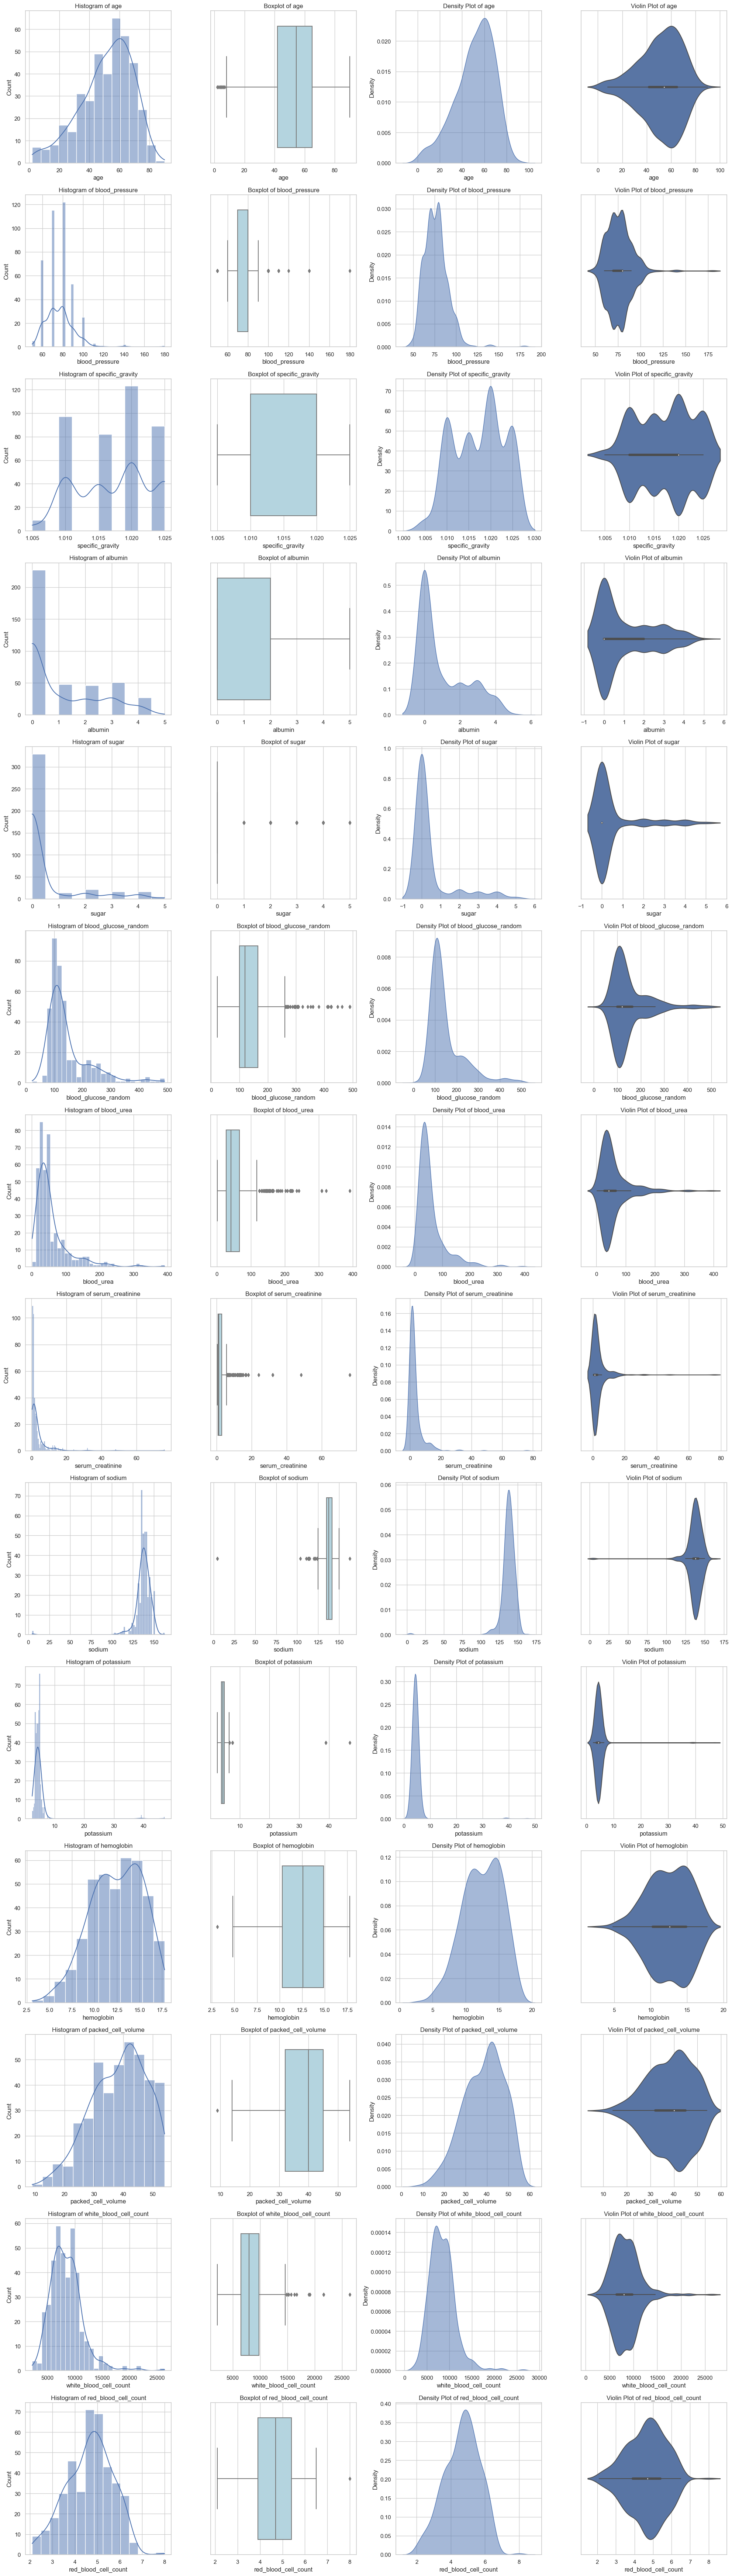

In [138]:
### exploring distribution of numeric variables/columns  

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=len(numeric), ncols=4, figsize=(20, 5 * len(numeric))) 

# Set the aesthetics for seaborn plots
sns.set(style="darkgrid")


# Iterate over the columns to create plots
for i, col in enumerate(numeric):
    
    # Histogram
    sns.histplot(kidney[col], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(x=kidney[col], ax=axs[i, 1], color='lightblue')
    axs[i, 1].set_title(f'Boxplot of {col}')

    # Density Plot
    sns.kdeplot(kidney[col], ax=axs[i, 2], fill=True, alpha=.5)
    axs[i, 2].set_title(f'Density Plot of {col}')

    # Violin Plot
    sns.violinplot(x=kidney[col], ax=axs[i, 3])
    axs[i, 3].set_title(f'Violin Plot of {col}')

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()

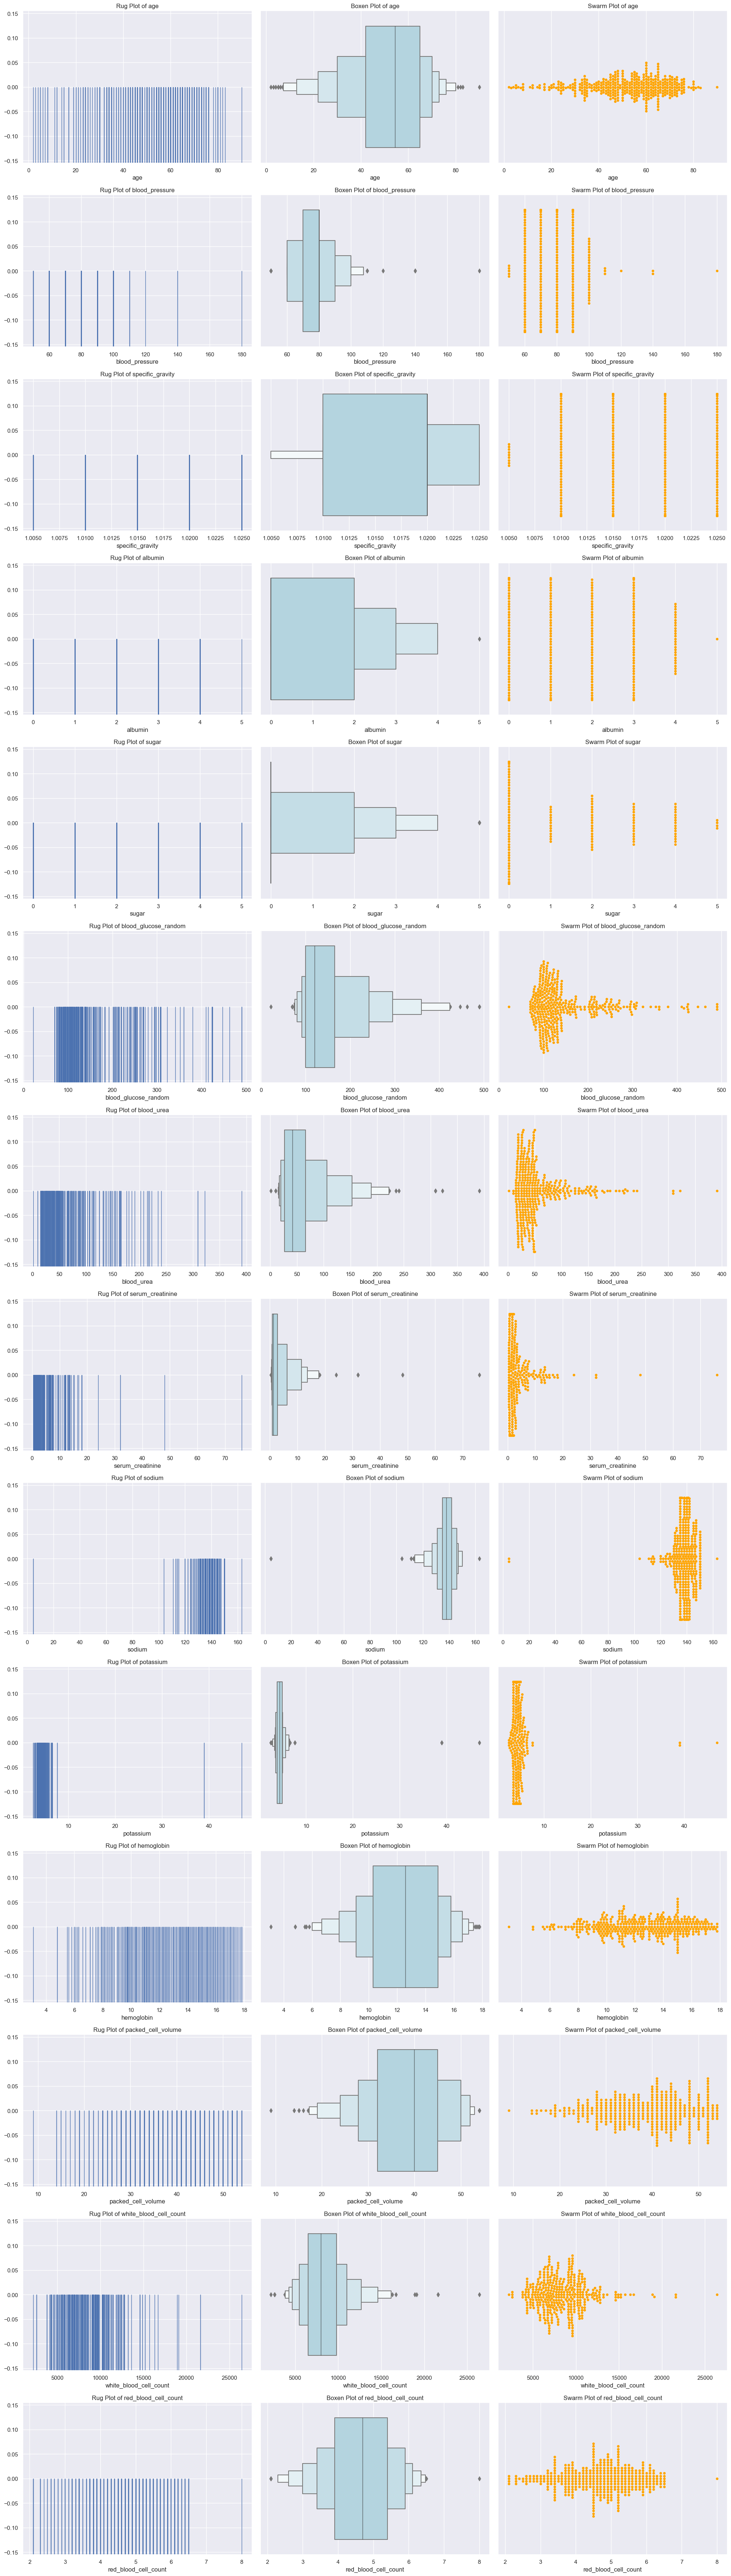

In [139]:
### make boxen, swarm, rug plots

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=len(numeric), ncols=3, figsize=(20, 5 * len(numeric)))

# Set the aesthetics for seaborn plots
sns.set(style="darkgrid")

# Iterate over the columns to create plots
for i, col in enumerate(numeric):
    # Rugplot
    sns.rugplot(kidney[col], ax=axs[i, 0], height=.5)
    axs[i, 0].set_title(f'Rug Plot of {col}')
    
    # Boxenplot
    sns.boxenplot(x=kidney[col], ax=axs[i, 1], color='lightblue')
    axs[i, 1].set_title(f'Boxen Plot of {col}')

    # Swarm Plot
    sns.swarmplot(x=kidney[col], ax=axs[i, 2], color='orange')
    axs[i, 2].set_title(f'Swarm Plot of {col}')

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()

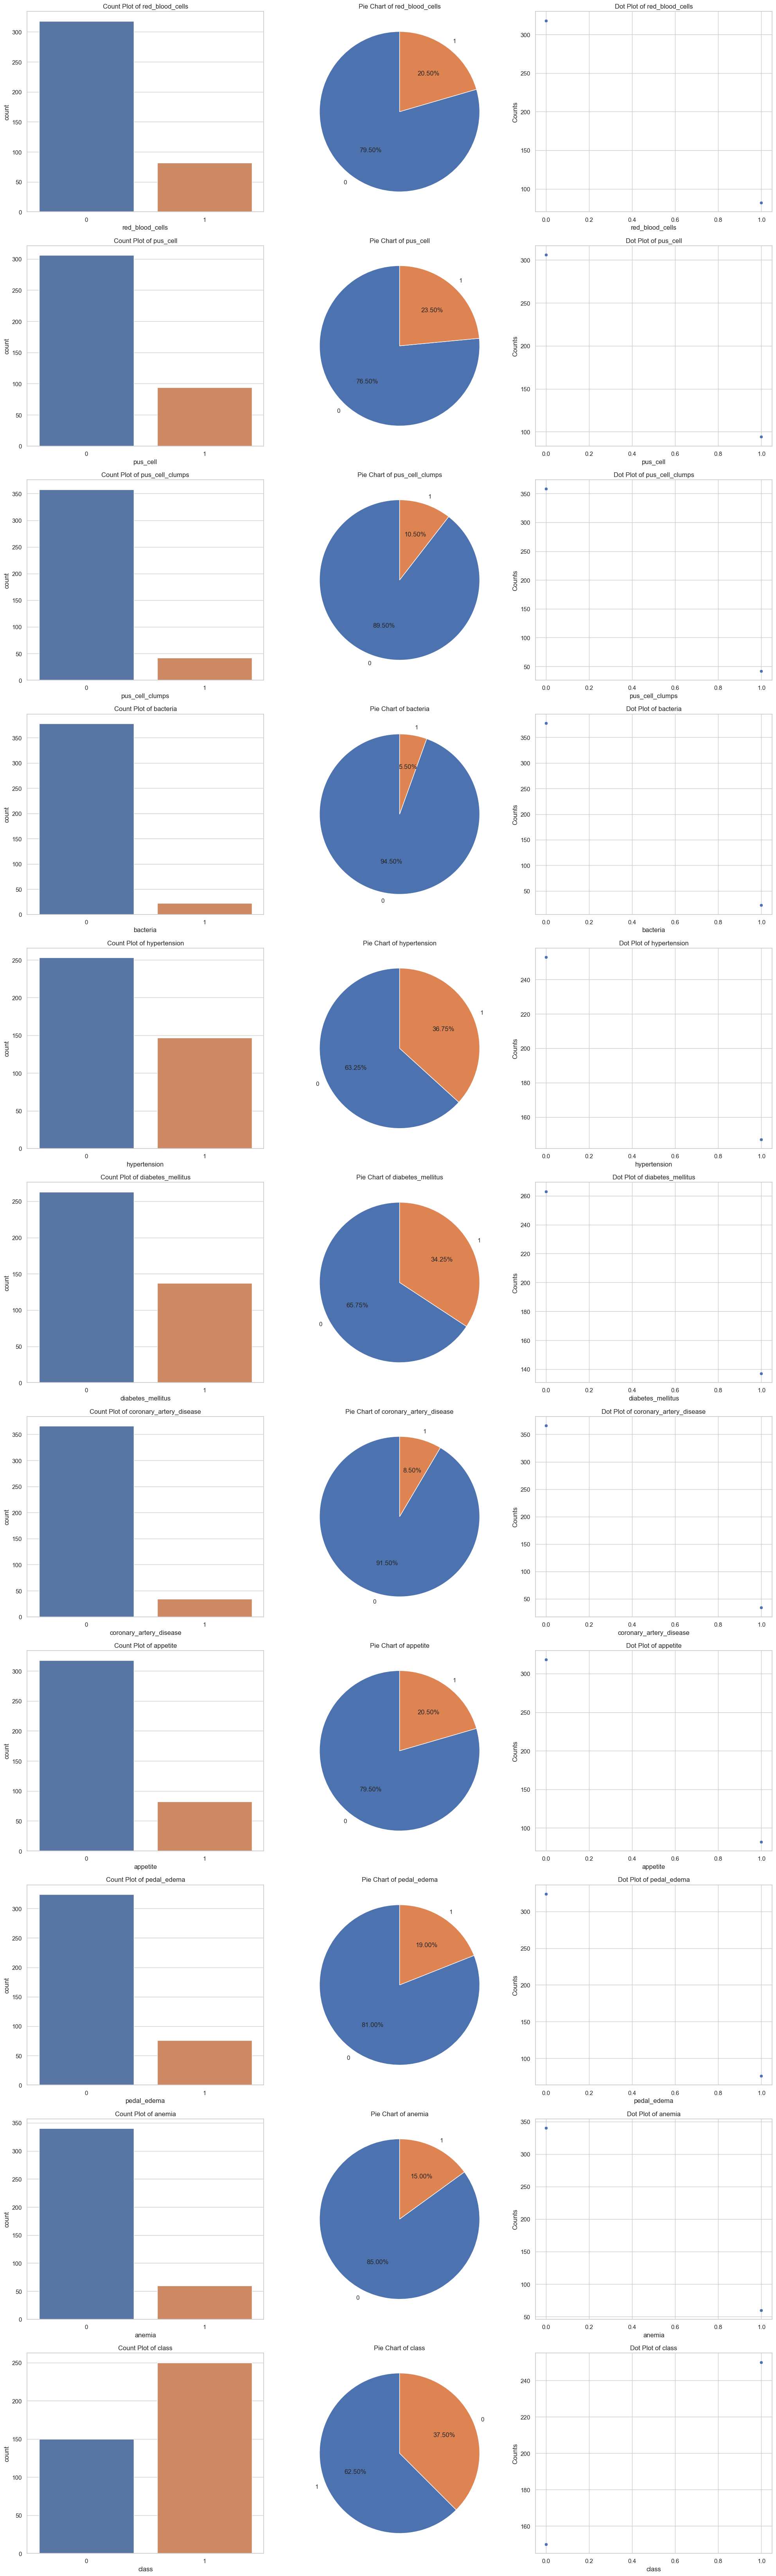

In [140]:
## Distribution of Categorical variables 


# Set the aesthetics for seaborn plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=len(factors), ncols=3, figsize=(20, 6 * len(factors)))

# Iterate over the columns to create plots
for i, col in enumerate(factors):
    
    # Count Plot
    sns.countplot(x=kidney[col], ax=axs[i, 0])
    axs[i, 0].set_title(f'Count Plot of {col}')

    # Pie Chart
    kidney[col].value_counts().plot(kind='pie', ax=axs[i, 1], autopct='%1.2f%%', startangle=90) #auto percentage
    axs[i, 1].set_title(f'Pie Chart of {col}')
    axs[i, 1].set_ylabel('')  # Remove the y-label

    # Dot Plot
    value_counts = kidney[col].value_counts()
    sns.scatterplot(x=value_counts.index, y=value_counts.values, ax=axs[i, 2]) #index(labels) of Series from value_counts()
    axs[i, 2].set_title(f'Dot Plot of {col}')
    axs[i, 2].set_ylabel('Counts')
    axs[i, 2].set_xlabel(col)

# Adjust layout 
plt.tight_layout()

# Display the plots
plt.show()

### Correlations 

In [141]:
kidney[numeric].corr()

age  blood_pressure  specific_gravity   albumin  \
age                     1.000000        0.147115         -0.170109  0.101343   
blood_pressure          0.147115        1.000000         -0.117454  0.108856   
specific_gravity       -0.170109       -0.117454          1.000000 -0.388808   
albumin                 0.101343        0.108856         -0.388808  1.000000   
sugar                   0.215419        0.167132         -0.263606  0.204405   
blood_glucose_random    0.205771        0.130927         -0.268953  0.303606   
blood_urea              0.187774        0.162233         -0.261073  0.336596   
serum_creatinine        0.144307        0.121583         -0.213223  0.245589   
sodium                 -0.095497       -0.092931          0.175635 -0.179287   
potassium               0.062449        0.034605         -0.046991  0.144210   
hemoglobin             -0.175122       -0.232900          0.434756 -0.488705   
packed_cell_volume     -0.213130       -0.225944          0.396805 -0.406978   
white_blood_cell_count  0.047985       -0.012679         -0.169048  0.175248   
red_blood_cell_count   -0.138379       -0.141398          0.377145 -0.362970   

                           sugar  blood_glucose_random  blood_urea  \
age                     0.215419              0.205771    0.187774   
blood_pressure          0.167132              0.130927    0.162233   
specific_gravity       -0.263606             -0.268953   -0.261073   
albumin                 0.204405              0.303606    0.336596   
sugar                   1.000000              0.588669    0.132522   
blood_glucose_random    0.588669              1.000000    0.096917   
blood_urea              0.132522              0.096917    1.000000   
serum_creatinine        0.115483              0.059375    0.551993   
sodium                 -0.116272             -0.114809   -0.232254   
potassium               0.213544              0.096461    0.262871   
hemoglobin             -0.184874             -0.246876   -0.515539   
packed_cell_volume     -0.138942             -0.190850   -0.462370   
white_blood_cell_count  0.086902              0.145838    0.023467   
red_blood_cell_count   -0.162757             -0.225659   -0.353322   

                        serum_creatinine    sodium  potassium  hemoglobin  \
age                             0.144307 -0.095497   0.062449   -0.175122   
blood_pressure                  0.121583 -0.092931   0.034605   -0.232900   
specific_gravity               -0.213223  0.175635  -0.046991    0.434756   
albumin                         0.245589 -0.179287   0.144210   -0.488705   
sugar                           0.115483 -0.116272   0.213544   -0.184874   
blood_glucose_random            0.059375 -0.114809   0.096461   -0.246876   
blood_urea                      0.551993 -0.232254   0.262871   -0.515539   
serum_creatinine                1.000000 -0.440853   0.156380   -0.331308   
sodium                         -0.440853  1.000000   0.078533    0.240485   
potassium                       0.156380  0.078533   1.000000   -0.147947   
hemoglobin                     -0.331308  0.240485  -0.147947    1.000000   
packed_cell_volume             -0.267592  0.277089  -0.141490    0.723797   
white_blood_cell_count         -0.022472 -0.027322  -0.090573   -0.111467   
red_blood_cell_count           -0.201598  0.148075  -0.082284    0.530296   

                        packed_cell_volume  white_blood_cell_count  \
age                              -0.213130                0.047985   
blood_pressure                   -0.225944               -0.012679   
specific_gravity                  0.396805               -0.169048   
albumin                          -0.406978                0.175248   
sugar                            -0.138942                0.086902   
blood_glucose_random             -0.190850                0.145838   
blood_urea                       -0.462370                0.023467   
serum_creatinine                 -0.267592               -0.0

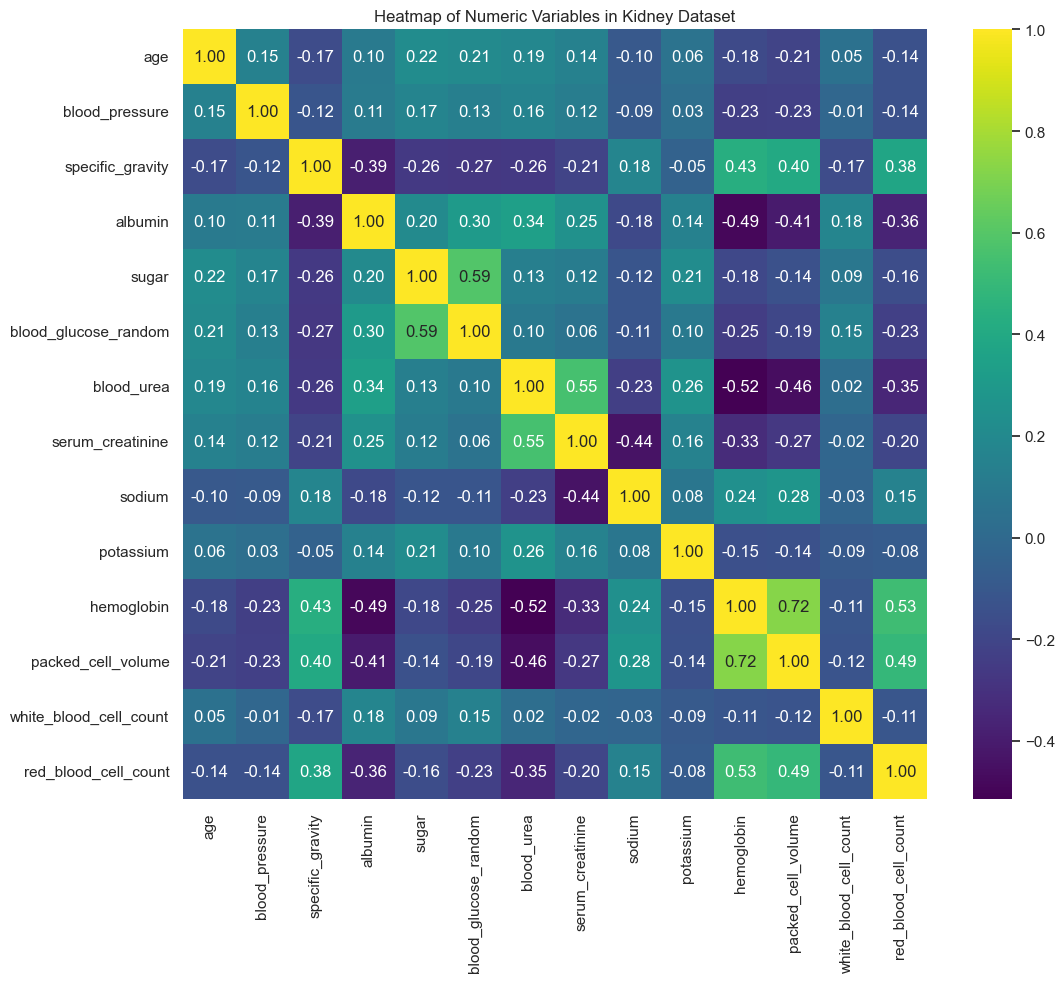

In [142]:
### Pearson Correlation between Numeric Variables 


# Compute the correlation matrix for numeric columns
corr_matrix = kidney[numeric].corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Heatmap of Numeric Variables in Kidney Dataset')
plt.show()

In [143]:
### Calculate point-biserial correlation 

point_biserial_corrs = {}
p_values = {}
for col in numeric:
    corr, p_value = stats.pointbiserialr(kidney[col], kidney['class'])
    point_biserial_corrs[col] = corr
    p_values[col] = p_value
print(f"A numeric feature: point-biserial correlation coefficient--{point_biserial_corrs}\n")
print(f"A numeric feature: point-biserial correlation p-value --{p_values}")

A numeric feature: point-biserial correlation coefficient--{'age': 0.22290063884273792, 'blood_pressure': 0.26106122356620626, 'specific_gravity': -0.6543950574562212, 'albumin': 0.5606054468364461, 'sugar': 0.30423155245012545, 'blood_glucose_random': 0.38914336222157586, 'blood_urea': 0.34764001476572215, 'serum_creatinine': 0.2668766558685226, 'sodium': -0.2658485954399659, 'potassium': 0.07536201383396167, 'hemoglobin': -0.7094301074750156, 'packed_cell_volume': -0.6203115939381687, 'white_blood_cell_count': 0.17278178514569822, 'red_blood_cell_count': -0.5267451997733271}

A numeric feature: point-biserial correlation p-value --{'age': 6.769465579817038e-06, 'blood_pressure': 1.1770886361341921e-07, 'specific_gravity': 2.958438001536268e-50, 'albumin': 1.7544477144857031e-34, 'sugar': 5.182337332397185e-10, 'blood_glucose_random': 6.521048069523856e-16, 'blood_urea': 8.340801147108821e-13, 'serum_creatinine': 5.978869360591692e-08, 'sodium': 6.747454498933075e-08, 'potassium': 0.1

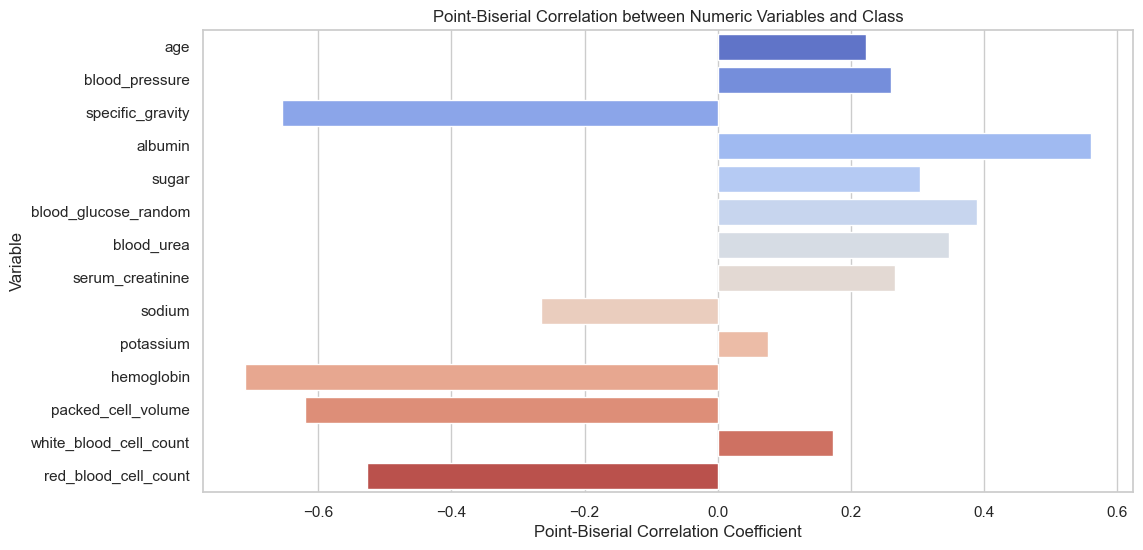

In [144]:
### plot point-biserial correlations 

# Convert the results to a DataFrame for easy plotting
corr_df = pd.DataFrame(list(point_biserial_corrs.items()), columns=['Variable', 'Correlation'])

# Sort the DataFrame by the absolute values of the correlations in descending order
#corr_df['Absolute Correlation'] = corr_df['Correlation'].abs()
#corr_df.sort_values(by='Absolute Correlation', ascending=False, inplace=True)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Correlation', y='Variable', data=corr_df, palette='coolwarm')
plt.title('Point-Biserial Correlation between Numeric Variables and Class')
plt.xlabel('Point-Biserial Correlation Coefficient')
plt.ylabel('Variable')
plt.show()

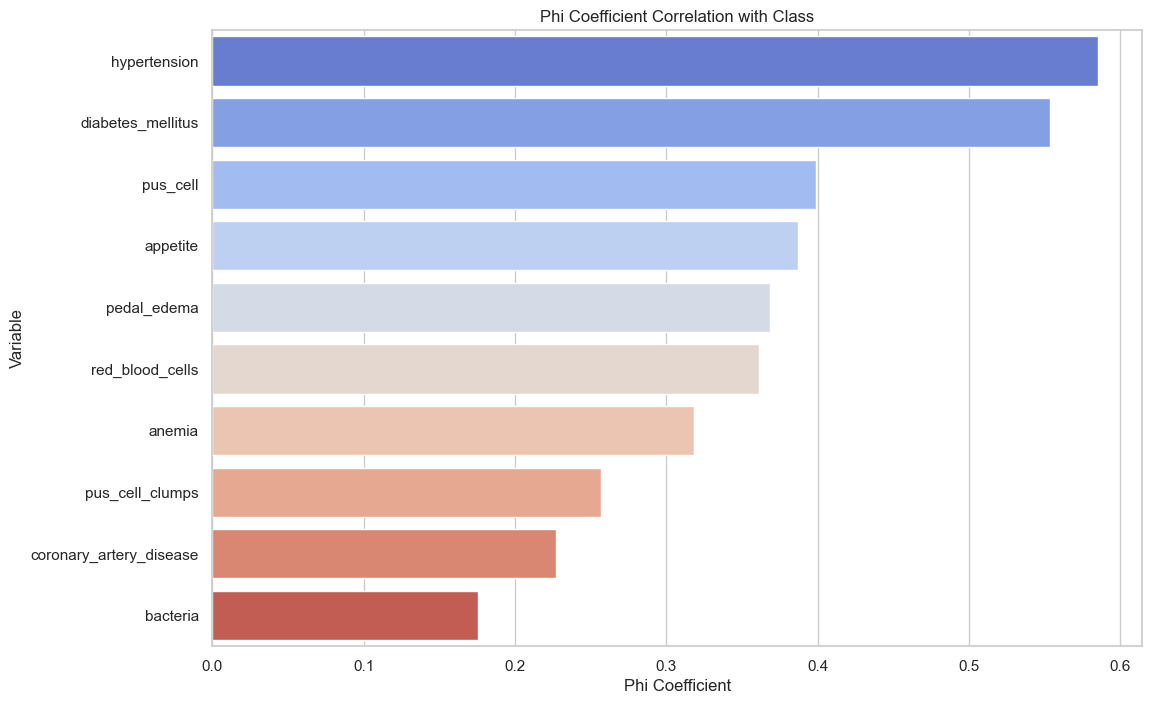

In [145]:
from scipy.stats import chi2_contingency

# Calculate Phi coefficient 
phi_coefficients = {}
for var in factors:
    if var != 'class':  # Exclude comparing 'class' with itself
        contingency_table = pd.crosstab(kidney[var], kidney['class'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        phi = (chi2 / kidney.shape[0]) ** 0.5
        phi_coefficients[var] = phi

# Convert the results to a DataFrame for easy plotting
phi_df = pd.DataFrame(list(phi_coefficients.items()), columns=['Variable', 'Phi Coefficient'])

# Sort the DataFrame by the Phi coefficients in descending order
phi_df.sort_values('Phi Coefficient', ascending=False, inplace=True)

# Plot the Phi coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Phi Coefficient', y='Variable', data=phi_df, palette='coolwarm')
plt.title('Phi Coefficient Correlation with Class')
plt.xlabel('Phi Coefficient')
plt.ylabel('Variable')
plt.show()

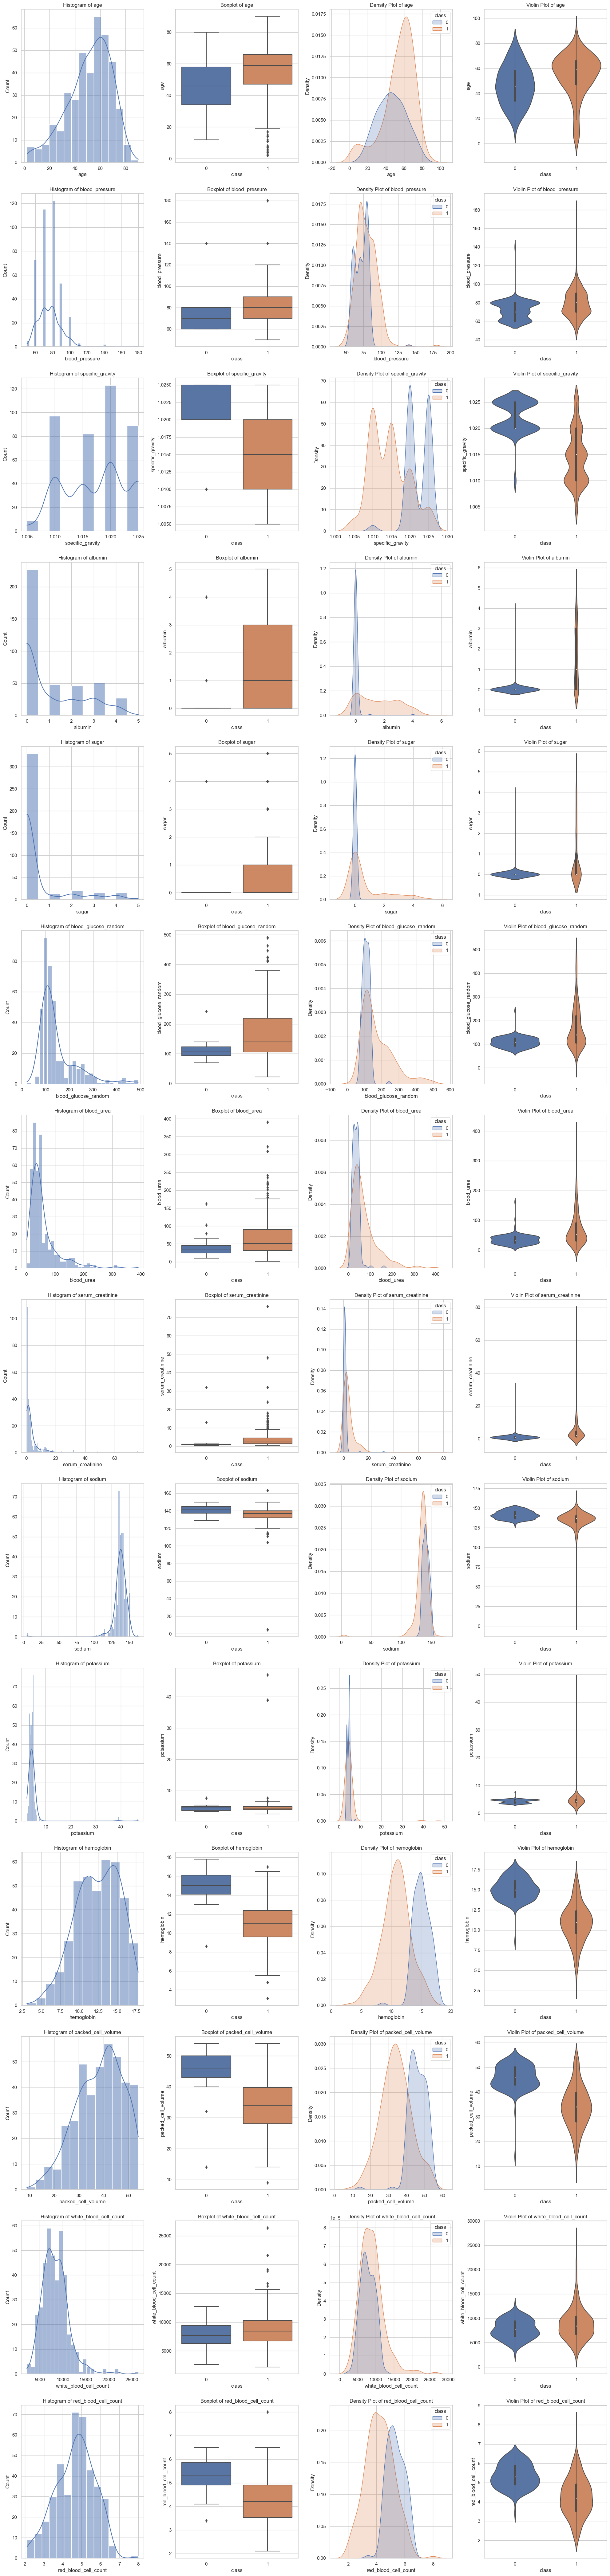

In [146]:
### Distribution of Continous Features Across Subcategories of Target Variable


# Set the aesthetics for seaborn plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=len(numeric), ncols=4, figsize=(20, 6 * len(numeric)))

# Iterate over each numeric column to create the plots
for i, col in enumerate(numeric):
    
    # Histogram
    sns.histplot(kidney[col], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(data=kidney, y=col, x='class', ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot of {col}')

    # Density Plot
    sns.kdeplot(data=kidney, x=col, hue='class', ax=axs[i, 2], fill=True)
    axs[i, 2].set_title(f'Density Plot of {col}')

    # Violin Plot
    sns.violinplot(data=kidney, y=col, x='class', ax=axs[i, 3], orient='v', split=True)
    axs[i, 3].set_title(f'Violin Plot of {col}')

# Display the plots
plt.tight_layout()
plt.show()


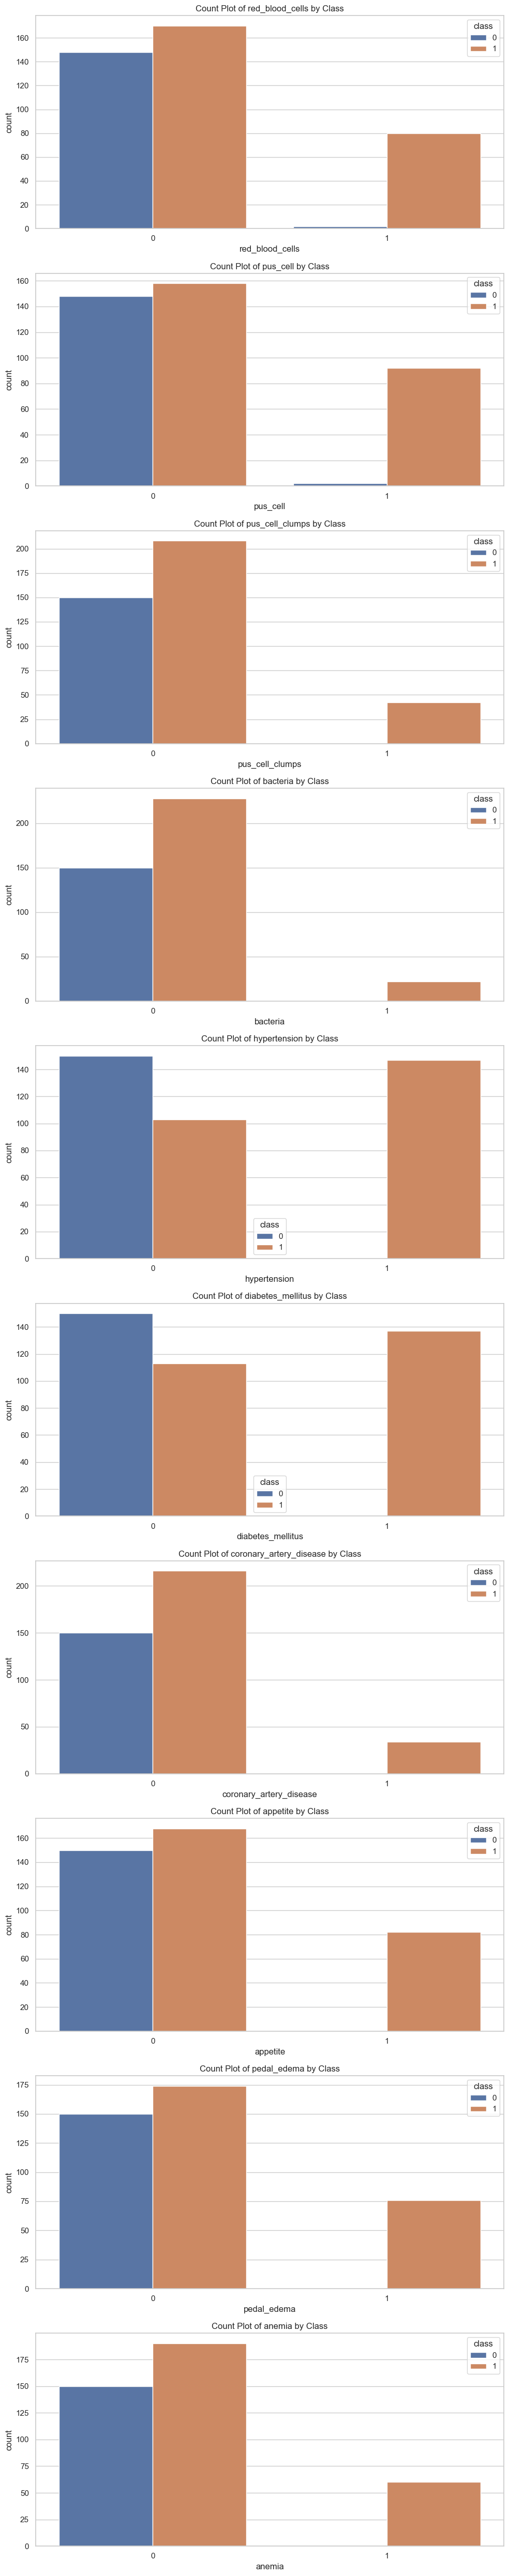

In [147]:
### Distribution of Binary Features Across Subcategories of Target Variable

binary = [col for col in factors if col != 'class'] # list comprehension

# Set the aesthetics for seaborn plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=len(binary), ncols=1, figsize=(10, 5 * len(binary)))

# Check if there's only one factor, axs should be an array
if len(binary) == 1:
    axs = [axs]

# Iterate over each binary factor to create the count plots
for i, col in enumerate(binary):
    sns.countplot(data=kidney, x=col, hue='class', ax=axs[i])
    axs[i].set_title(f'Count Plot of {col} by Class')

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()

In [148]:
### We can scale numeric variables 

from sklearn.preprocessing import StandardScaler

X = kidney[numeric]
X_bin = kidney [binary]
y = kidney['class']


# Initialize a Standard Scaler
scaler = StandardScaler()

# Fit and transform the data
X_std= scaler.fit_transform(X)

# Convert back to DataFrame (if needed)
X_std = pd.DataFrame(X_std, columns=numeric)

## <center> Statistical Models and Interpretation 

In [149]:
import statsmodels.formula.api as smf

### Create a formula string
# for instance: formula = 'class ~ age'

### Build the logistic regression model using the formula interface
#logit_model = smf.logit(formula, data = kidney)

### Fit the model
#logit_result = logit_model.fit()

### Print the summary to get p-values and other statistics
#print(logit_result.summary())

In [150]:
### Get Predicted Probabilities 

In [151]:
### Get Predicted Probabilities Keeping Other Variables at Their Means 

In [152]:
### Plot Predict Probabilities 

In [153]:
### We can think of marginal effects here as well 

## <center> Predictive Modeling 

### Logistic Regression Classifier 

Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

ROC-AUC Score: 0.9725274725274726


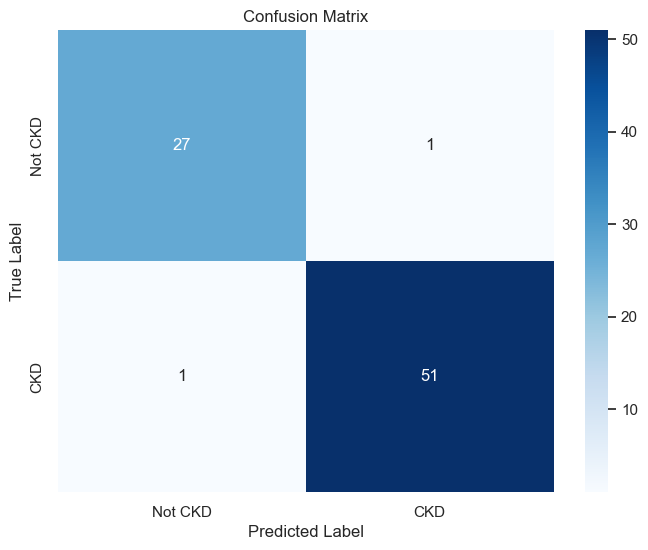

In [154]:
X = kidney.drop('class', axis=1)
y = kidney['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)  # max_iter may be increased if the algorithm doesn't converge
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")
print(f"ROC-AUC Score: {roc_auc}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Naive Bayes Classifier
Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



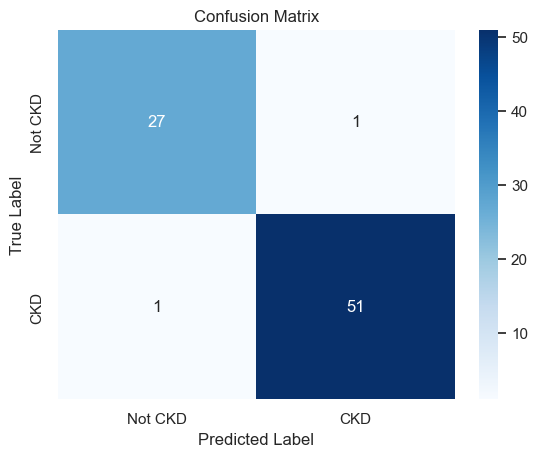

In [155]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

print("Naive Bayes Classifier")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

## plot confusion matrix 
sns.heatmap(confusion_matrix(y_test, nb_predictions), annot=True, 
            fmt='g', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Decision Tree Classifier
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.96      0.96      0.96        52

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



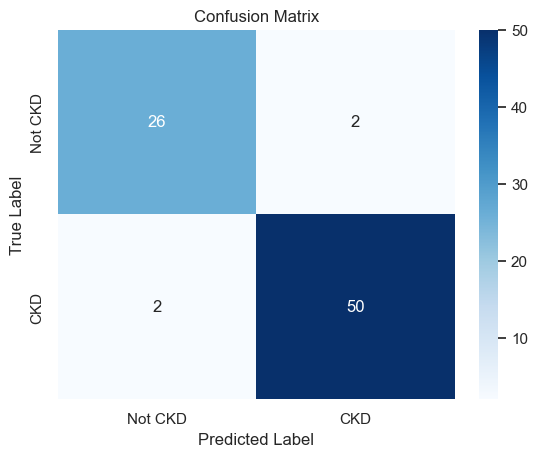

In [156]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier 

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

## plot confusion matrix 
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, 
            fmt='g', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Random Forest Classifier
Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.96      1.00      0.98        52

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



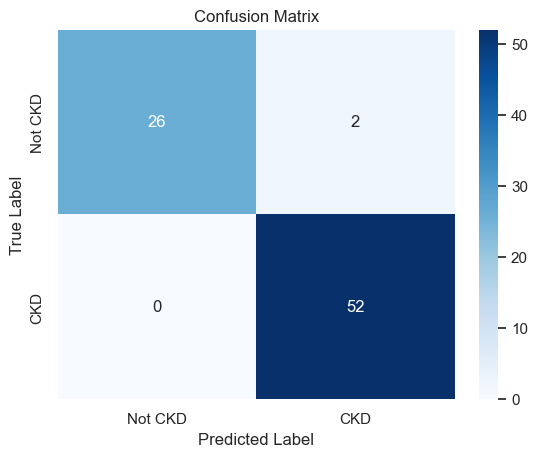

In [161]:

from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier 

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

## plot confusion matrix 
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, 
            fmt='g', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# <center> Model Tuning and Hyperparameter Optimization 